# numbers classification

In [1]:
import torch
from torch import nn
from d2l import torch as d2l
import numpy as np

batch_size = 256
train_iter, test_iter = d2l.xn_load_data_mnist(batch_size)

In [2]:
num_inputs, num_outputs, num_hiddens = 784, 10, 256

W1 = nn.Parameter(torch.randn(
    num_inputs, num_hiddens, requires_grad=True) * 0.01)
b1 = nn.Parameter(torch.zeros(num_hiddens, requires_grad=True))
W2 = nn.Parameter(torch.randn(
    num_hiddens, num_outputs, requires_grad=True) * 0.01)
b2 = nn.Parameter(torch.zeros(num_outputs, requires_grad=True))

params = [W1, b1, W2, b2]

激活函数 ReLU函数=max(x,0)-> 最简单,也可以用：sigmoid 激活函数，还有tanh激活函数

In [3]:
def relu(X):
    a = torch.zeros_like(X)
    return torch.max(X, a)

In [4]:
def net(X):
    X = X.reshape((-1, num_inputs))
    H = relu(X@W1 + b1)  # 这里“@”代表矩阵乘法
    return (H@W2 + b2)

In [5]:
loss = nn.CrossEntropyLoss(reduction='none')

test_acc:0.9672


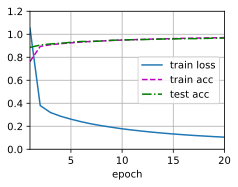

In [6]:
num_epochs, lr = 10, 0.1
updater = torch.optim.SGD(params, lr=lr)
d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs, updater)

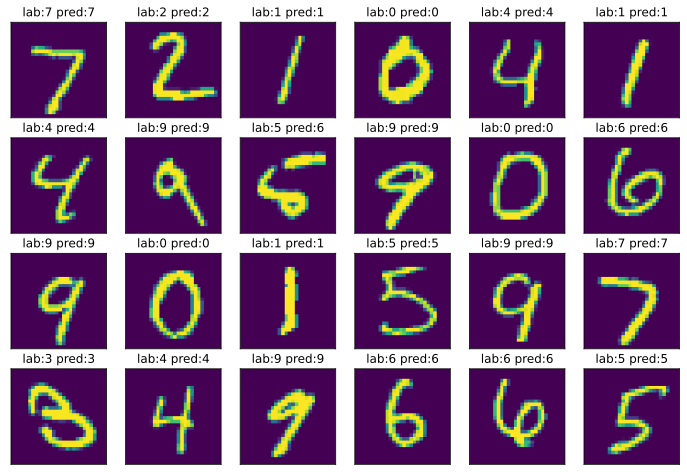

In [7]:
def xn_get_mnist_labels(y):
    return (np.array(y,dtype='int32'))

def xn_predict_ch3(net, test_iter, rows=1, cols=6): 
    """预测标签（定义见第3章）"""
    for X, y in test_iter:
        break
    trues = xn_get_mnist_labels(y)
    preds = xn_get_mnist_labels(net(X).argmax(axis=1))
    titles = ["lab:"+str(true) +' ' + "pred:" +str(pred) for true, pred in zip(trues, preds)]
    d2l.show_images(
        X[0:cols*rows].reshape((cols*rows, 28, 28)), rows, cols, titles=titles[0:cols*rows], scale= 2.0)
    
xn_predict_ch3(net, test_iter, rows=4, cols=6)